In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt
import math

In [2]:
# Input Arrays
A = np.array([[1., 3., 0., 1], 
              [2., 1., 0., 0.], 
              [0., 1., 4., 1.], 
              [-1., 0., 0., 0.],
              [0., -1., 0., 0.],
              [0., 0., -1., 0.],
              [0., 0., 0., -1.]])
b = np.array([4., 3., 3., 0., 0., 0., 0.])
c = np.array([2., 4., 1., 1.])

In [3]:
def F(A, b, x):
    f = 0
    
    for i in range(A.shape[0]):
        f += -math.log(b[i] - np.dot(A[i,:], x))
    
    return f

In [4]:
def grad(A, b, x):
    
    g = 0
    for i in range(A.shape[0]):
        g += A[i,:]/(b[i] - np.dot(A[i,:],x))
    
    return g

In [5]:
def hess(A, b, x):
    h = np.zeros((A.shape[1],A.shape[1]))
    
    for i in range(A.shape[0]):
        h += np.outer(A[i,:], A[i,:])/(b[i] - np.dot(A[i,:], x))**2
    
    return h

In [13]:
def newton(A, b, x):
    eta = 1
    alpha = 0.01
    beta = 0.5
    
    hess_inv = la.inv(hess(A, b, x))
    print(hess_inv)
    g = grad(A, b, x)
    print(g)
    
    nstep = np.dot(hess_inv, g)
    print(nstep)
    
   # while F(A, b, x - eta*nstep) > F(A, b, x) + eta*alpha*np.dot(nstep, nstep):
   #     eta = beta*eta
    
    xlast = x
    x = x - eta*nstep
    
    return x, xlast

In [17]:
def descent(update, A, b):
    T = 100
    tol = 1e-3
    
    x = 0.1*np.ones(A.shape[1])
    
    for t in range(T):
        x, xlast = update(A, b, x)
        print(x)
        #print(dec)
        
        if la.norm(x - xlast) <= tol:
            return x, t
    
    return x, t

In [18]:
x, t = descent(newton, A, b)

[[  9.93763162e-03  -5.10369916e-05   3.98097279e-07  -7.88140567e-06]
 [ -5.10369916e-05   9.89742281e-03  -6.65987130e-05  -4.08132849e-05]
 [  3.98097279e-07  -6.65987130e-05   9.73063326e-03  -6.71241153e-05]
 [ -7.88140567e-06  -4.08132849e-05  -6.71241153e-05   9.97518235e-03]]
[-8.97354497 -8.35582011 -8.33333333 -9.29761905]
[-0.08867937 -0.08130865 -0.0799116  -0.09177433]
[ 0.18867937  0.18130865  0.1799116   0.19177433]
[[  3.46583462e-02  -7.09738902e-04   2.58104744e-05  -1.18677112e-04]
 [ -7.09738902e-04   3.14919402e-02  -9.61386362e-04  -6.35170691e-04]
 [  2.58104744e-05  -9.61386362e-04   2.83988791e-02  -1.11206482e-03]
 [ -1.18677112e-04  -6.35170691e-04  -1.11206482e-03   3.63281337e-02]]
[-4.1556342  -3.606122   -3.46104747 -4.36501526]
[-0.14103931 -0.10451443 -0.09007607 -0.15194027]
[ 0.32971868  0.28582308  0.26998767  0.34371459]
[[ 0.0976239  -0.00652112  0.00079185 -0.00116919]
 [-0.00652112  0.07072248 -0.00660906 -0.00653631]
 [ 0.00079185 -0.00660906  0

In [16]:
print(x)
print(t)

[ 0.55467579  0.30962071  0.2541443   0.6572249 ]
5


The analytical center using Netwon's Method is:

$$x = [ 0.5546, 0.3096, 0.2541, 0.6572 ]^T$$

### Linear Programming Solution

In [10]:
from scipy.optimize import linprog

In [11]:
xstar = linprog(c, A_ub=A, b_ub=b)
print(xstar)

     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([ 4.,  3.,  3.,  0.,  0.,  0.,  0.])
  status: 0
 success: True
       x: array([ 0.,  0.,  0.,  0.])


### Central Path Algorithm

In [12]:
def f(A, b, x, c, t):
    f = t*np.dot(c, x) + F(A, b, x)
    
    return f

In [13]:
def gradf(A, b, x, c, t):
    g = t*c + grad(A, b, x)
    
    return g

In [14]:
def newton2(A, b, x, c, t):
    eta = 0.1
    alpha = 0.05
    beta = 0.8
    
    hess_inv = la.inv(hess(A, b, x))
    g = gradf(A, b, x, c, t)
    
    nstep = np.dot(hess_inv, g)
    dec = np.dot(g, nstep)
    
    #while f(A, b, x + eta*nstep, c, t) > f(A, b, x, c, t) + eta*alpha*np.dot(g, nstep):
        #eta = beta*eta
    
    x = x - eta*nstep
    
    return x, dec

In [15]:
def descent2(update, A, b, x, c, a):
    
    m = 1
    eps = 1e-5
    t = 0.1
    
    error = []
    error.append(la.norm(x))
    T = 100
    tol = 1e-5
    o = 0
    
    while m/t > eps or o > 50:
        # Newton Step
        y = x
        for i in range(T):
            y, dec = update(A, b, y, c, t)
            #print(dec)
        
            error.append(la.norm(y))
        
            if dec/2 <= tol:
               break;
        t = (1 + a)*t
        x = y
        o += 1
    
    return x, error

In [16]:
x0, error0 = descent2(newton2, A, b, x, c, 2)
x1, error1 = descent2(newton2, A, b, x, c, 10)

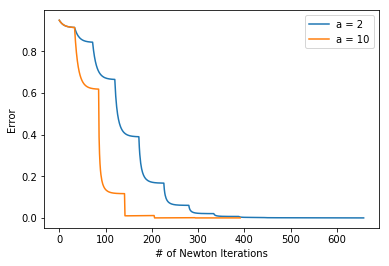

In [17]:
%matplotlib inline

plt.plot(error0, label="a = 2")
plt.plot(error1, label="a = 10")
plt.xlabel("# of Newton Iterations")
plt.ylabel("Error")
plt.legend()